<a href="https://colab.research.google.com/github/iammuhammad41/Augmented-Reality-AR-and-Virtual-Reality-VR-Assisted-Deep-Learning/blob/main/ai-at-medical-imaging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import os
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import pandas as pd

driver_path = 'chromedriver_win32\\chromedriver.exe'
service = Service(driver_path)
driver = webdriver.Chrome(service=service)

# Initialize a list to store the extracted information
paper_info = []

while True:

    url = f"https://scholar.google.com/scholar?as_ylo=2021&as_yhi=2023&start=0&q=topic+modelling+site%3Aieeexplore.ieee.org"
    driver.get(url)
    # Find the list of research papers
    papers = driver.find_elements(By.CLASS_NAME, "gs_r.gs_or.gs_scl")
    # Filter out the unwanted paper
    papers = [paper for paper in papers if "gs_qsuggest_wrap" not in paper.get_attribute("class")]

    # Scrape the title, year, abstract, and DOI link of each research paper
    for paper in papers:
        # Find the appropriate elements to extract the desired information
        href = paper.find_element(By.CLASS_NAME, "gs_rt").find_element(By.TAG_NAME, "a").get_attribute("href")

        # Visit the link to extract additional information
        driver.get(href)

        title_element = driver.find_element(By.CLASS_NAME, "document-title.text-2xl-md-lh").find_element(By.TAG_NAME, "span")
        title = title_element.text
        print("Title:",title)

        # Extract the year
        wait = WebDriverWait(driver, 10)
        year_element = wait.until(EC.visibility_of_element_located((By.CSS_SELECTOR, ".u-pb-1.doc-abstract-pubdate, .u-pb-1.doc-abstract-dateadded")))

        year = year_element.text
        year = year.split()[-1]
        print("Year:",year)

        # Extract the full abstracts
        full_abstract_elements = driver.find_elements(By.CLASS_NAME, "u-mb-1")
        abstracts = []
        for i in range(1, len(full_abstract_elements)):
            full_abstract_element = full_abstract_elements[i]
            full_abstract = full_abstract_element.text
            abstracts.append(full_abstract)
            print(full_abstract)

        # Store the extracted information in a dictionary
        paper_info.append({"Title": title, "Year": year, "Abstracts": abstract})

        driver.back()



    # Close the browser
    driver.quit()
    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(paper_info)

    # Save the DataFrame to a CSV file in append mode
    csv_file = 'scraped_data.csv'
    mode = 'a' if os.path.isfile(csv_file) else 'w'
    with open(csv_file, mode, newline='', encoding='utf-8') as file:
        df.to_csv(file, index=False, header=file.tell() == 0)

In [ ]:
import pandas as pd
file_path = '/content/input/research-papers-medical-imaging/scraped_data.csv'
df = pd.read_csv(file_path)

In [ ]:
df

,Title,Year,Abstracts
0,U-Net and Its Variants for Medical Image Segme...,2021,"[""Abstract:\nU-net is an image segmentation te..."
1,A Review of Deep Learning in Medical Imaging: ...,2021,"['Abstract:\nSince its renaissance, deep learn..."
2,Recent Advances in Sparse Representation Based...,2021,"['Abstract:\nMedical image fusion, which aims ..."
3,Automatic Medical Image Diagnosis: Highlights ...,2022,['Abstract:\nThe annual IEEE 5-Minute Video Cl...
4,DS-TransUNet: Dual Swin Transformer U-Net for ...,2022,['Abstract:\nAutomatic medical image segmentat...
...,...,...,...
875,PSO based Medical Image Enhancement for Qualit...,2023,['Abstract:\nThis work provides a particle swa...
876,Recurrent Tissue-Aware Network for Deformable ...,2021,['Abstract:\nDeformable registration is fundam...
877,Multi-Modal Imaging Genetics Data Fusion via a...,2022,['Abstract:\nRecent studies show that multi-mo...
878,Gesture Recognition in Robotic Surgery With Mu...,2022,['Abstract:\nAutomatically recognising surgica...


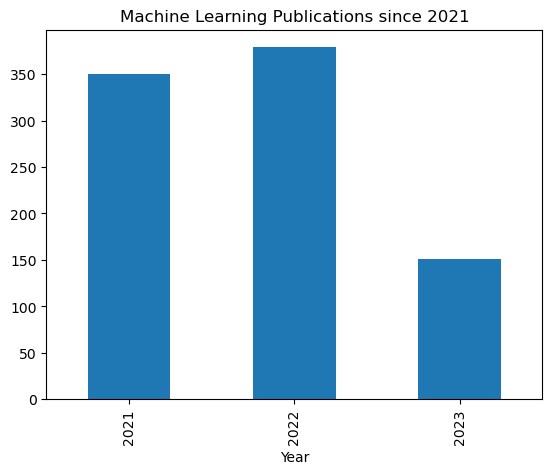

In [ ]:
# Group the papers by year
groups = df.groupby("Year")

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.title("Machine Learning Publications since 2021")
plt.xlabel("Year");
print(groups,)

In [ ]:
# Load the regular expression library
import re

# Print the titles of the first rows
print(df['Title'].head())

# Remove punctuation
df['title_processed'] = df['Title'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df['title_processed'] = df['title_processed'].map(lambda x: x.lower())

# Print the processed titles of the first rows
print(df['title_processed'].head())

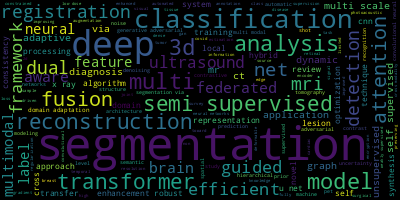

In [ ]:
# Load the regular expression library
import re
import pandas as pd

# Remove punctuation and brackets
df['Abstracts_processed'] = df['Abstracts'].map(lambda x: re.sub('[,\.!?]', '', x))
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r'^\[|\]$', '', x))

# Remove single quotes and double quotes
df['Abstracts_processed'] = df['Abstracts_processed'].map(lambda x: re.sub(r"['\"]", '', x))

for i in range(len(df)):
  df['Abstracts_processed'][i] = df['Abstracts_processed'][i][11:]

# Convert the abstracts to lowercase
df['Abstracts_processed'] = df['Abstracts_processed'].str.lower()

# Print the processed abstracts of the first rows
print(df['Abstracts_processed'].head())


/tmp/ipykernel_28/4028582891.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
/tmp/ipykernel_28/4028582891.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)


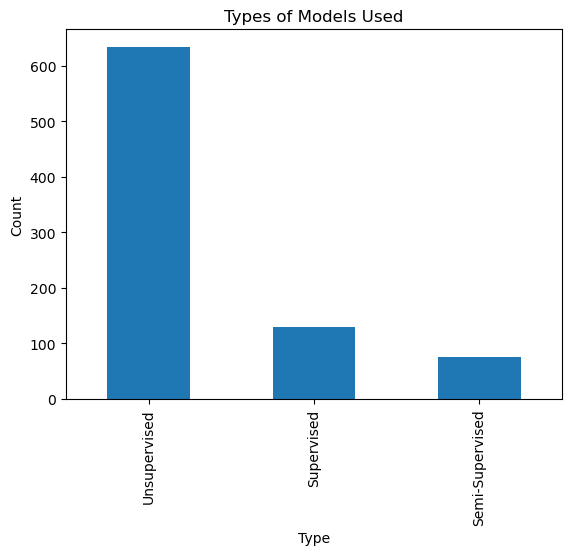

In [ ]:
import matplotlib.pyplot as plt

# Create a boolean mask to filter rows based on the combined search condition
mask = df["Abstracts_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True) | \
       df["title_processed"].str.contains(r"semi(\s)?supervised|unsupervised|su", case=False, regex=True)

# Apply the mask to the DataFrame and count the occurrence of each type
type_counts = df[mask].apply(lambda x: "Semi-Supervised" if "semi" in x["Abstracts_processed"] or "semi" in x["title_processed"]
                                         else "Supervised" if "supervised" in x["Abstracts_processed"] or "supervised" in x["title_processed"]
                                         else "Unsupervised", axis=1).value_counts()

# Plot the counts as a bar plot
type_counts.plot(kind='bar')
plt.title("Types of Models Used")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()


In [ ]:
import re
import pandas as pd

# Function to extract models or methods mentioned in the text
def extract_models(text):
    # Define patterns for common model or method names
    model_patterns = [
        r"U-Net",
        r"ResNet",
        r"GAN",
        r"SVM",
        r"DenseNet",
        r"VGGNet",
        r"InceptionNet",
        r"EfficientNet",
        r"MobileNet",
        r"V-Net",
        r"DeepLab",
        r"Mask R-CNN",
        r"R-CNN",
        r"NASNet",
        r"SE-Net",
        r"Xception",
        r"SR",
        r"Transformer",
        r"DS-TransUNet",
        r"MedMNIST",
        r"IoMT",
        r"DLaST",
        r"MED-MNIST",
        r"VinDr-CXR",
        r"DCAC",
        r"MAGAN"
    ]

    mentioned_models = []
    # Find matches of model patterns in the text
    for pattern in model_patterns:
        if re.search(pattern, text, flags=re.IGNORECASE):
            mentioned_models.append(pattern)

    return mentioned_models

# Create a new column 'Models_Used' to store the mentioned models
df['Models_Used'] = ""

# Extract and save the mentioned models for each abstract and title
for i, (abstract, title) in enumerate(zip(df['Abstracts_processed'], df['title_processed'])):
    abstract_models = extract_models(abstract)
    title_models = extract_models(title)
    all_models = abstract_models + title_models
    unique_models = list(set(all_models))
    if unique_models:
        df.at[i, 'Models_Used'] = ', '.join(unique_models)
    else:
        df.at[i, 'Models_Used'] = "NA"


In [ ]:
df.head(5)

,Title,Year,Abstracts,title_processed,Abstracts_processed,Models_Used
0,U-Net and Its Variants for Medical Image Segme...,2021,"[""Abstract:\nU-net is an image segmentation te...",u-net and its variants for medical image segme...,u-net is an image segmentation technique devel...,U-Net
1,A Review of Deep Learning in Medical Imaging: ...,2021,"['Abstract:\nSince its renaissance, deep learn...",a review of deep learning in medical imaging: ...,since its renaissance deep learning (dl) has b...,NA
2,Recent Advances in Sparse Representation Based...,2021,"['Abstract:\nMedical image fusion, which aims ...",recent advances in sparse representation based...,medical image fusion which aims to combine mul...,SR
3,Automatic Medical Image Diagnosis: Highlights ...,2022,['Abstract:\nThe annual IEEE 5-Minute Video Cl...,automatic medical image diagnosis: highlights ...,the annual ieee 5-minute video clip contest (5...,GAN
4,DS-TransUNet: Dual Swin Transformer U-Net for ...,2022,['Abstract:\nAutomatic medical image segmentat...,ds-transunet: dual swin transformer u-net for ...,automatic medical image segmentation has made ...,"Transformer, DS-TransUNet, U-Net"


Plotting Graph to analyze most used models

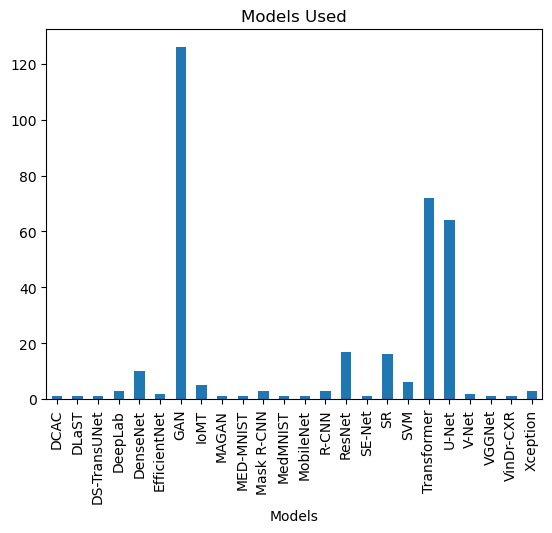

In [ ]:
# Remove NA values and "NA" string from the "Models_Used" column
df_cleaned = df.dropna(subset=["Models_Used"])
df_cleaned = df_cleaned[df_cleaned["Models_Used"] != "NA"]

# Split multiple models into separate rows
df_split = df_cleaned.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Group the papers by models used
groups = df_split.groupby("Models_Used")

# Determine the size of each group
counts = groups.size()

# Visualize the counts as a bar plot
import matplotlib.pyplot as plt
%matplotlib inline
counts.plot(kind='bar')
plt.title("Models Used")
plt.xlabel("Models")
plt.show()


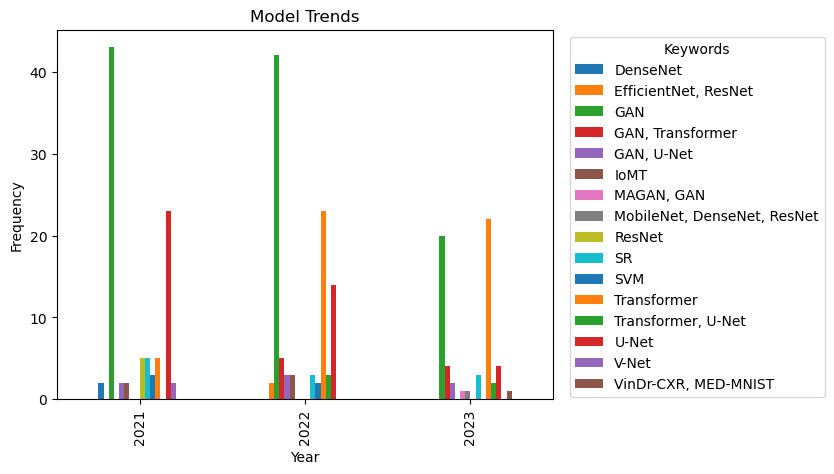

In [ ]:
df = df.dropna(subset=["Models_Used"])
df = df[df["Models_Used"] != "NA"]

# Group the papers by publication year and count the frequency of specific keywords or topics
keyword_counts = df.groupby("Year")["Models_Used"].apply(lambda x: x.explode().value_counts().nlargest(10))

# Split multiple models into separate rows
df = df.assign(Models_Used=df_cleaned["Models_Used"].str.split(", ")).explode("Models_Used")

# Plot the keyword counts as a bar plot
ax = keyword_counts.unstack().plot(kind='bar')
plt.title("Model Trends")
plt.xlabel("Year")
plt.ylabel("Frequency")

# Move the legend to the right of the graph
plt.legend(title="Keywords", bbox_to_anchor=(1.02, 1), loc="upper left")

plt.show()


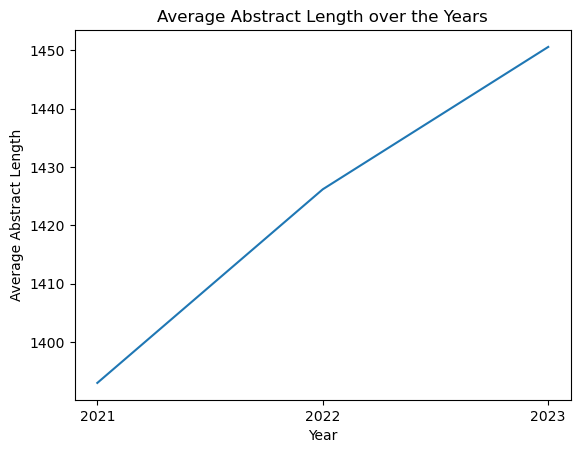

In [ ]:
# Calculate the length of abstracts
df['Abstract_Length'] = df['Abstracts_processed'].str.len()

# Group the papers by publication year and calculate the average abstract length
average_length = df.groupby('Year')['Abstract_Length'].mean()

# Plot the average abstract length over the years
plt.plot(average_length.index, average_length.values)
plt.title('Average Abstract Length over the Years')
plt.xlabel('Year')
plt.ylabel('Average Abstract Length')

# Set the x-axis ticks and labels
plt.xticks(average_length.index)

plt.show()


In [ ]:
#Setup
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import os
import seaborn as sns
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Conv2D, Reshape, Input, Conv2DTranspose
from keras.layers import Activation, LeakyReLU, BatchNormalization, Dropout, Resizing
from keras.losses import BinaryCrossentropy
from tensorflow.keras.applications import VGG16

import warnings
warnings.filterwarnings('ignore')

try:
    from tensorflow.keras.optimizers import Adam
except:
    from keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [ ]:
NOISE_DIM = 100
BATCH_SIZE = 4
STEPS_PER_EPOCH = 4000
EPOCHS = 10
SEED = 40
WIDTH, HEIGHT, CHANNELS = 128, 128, 1

OPTIMIZER = Adam(0.0002, 0.5)

In [ ]:
MAIN_DIR = "/content/input/brain-mri-images-for-brain-tumor-detection/yes"

In [ ]:
#Loading and Preprocessing the Images
def load_images(folder):

    imgs = []
    target = 1
    labels = []
    for i in os.listdir(folder):
        img_dir = os.path.join(folder,i)
        try:
            img = cv2.imread(img_dir)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (128,128))
            imgs.append(img)
            labels.append(target)
        except:
            continue

    imgs = np.array(imgs)
    labels = np.array(labels)

    return imgs, labels

In [ ]:
data, labels = load_images(MAIN_DIR)
data.shape, labels.shape

((155, 128, 128), (155,))

In [ ]:
#Generate 20 random numbers to index images from data
np.random.seed(SEED)
idxs = np.random.randint(0, 155, 20)

In [ ]:
X_train = data[idxs]
X_train.shape

(20, 128, 128)

In [ ]:
# Normalize the Images
X_train = (X_train.astype(np.float32) - 127.5) / 127.5

# Reshape images
X_train = X_train.reshape(-1, WIDTH,HEIGHT,CHANNELS)

# Check shape
X_train.shape

(20, 128, 128, 1)

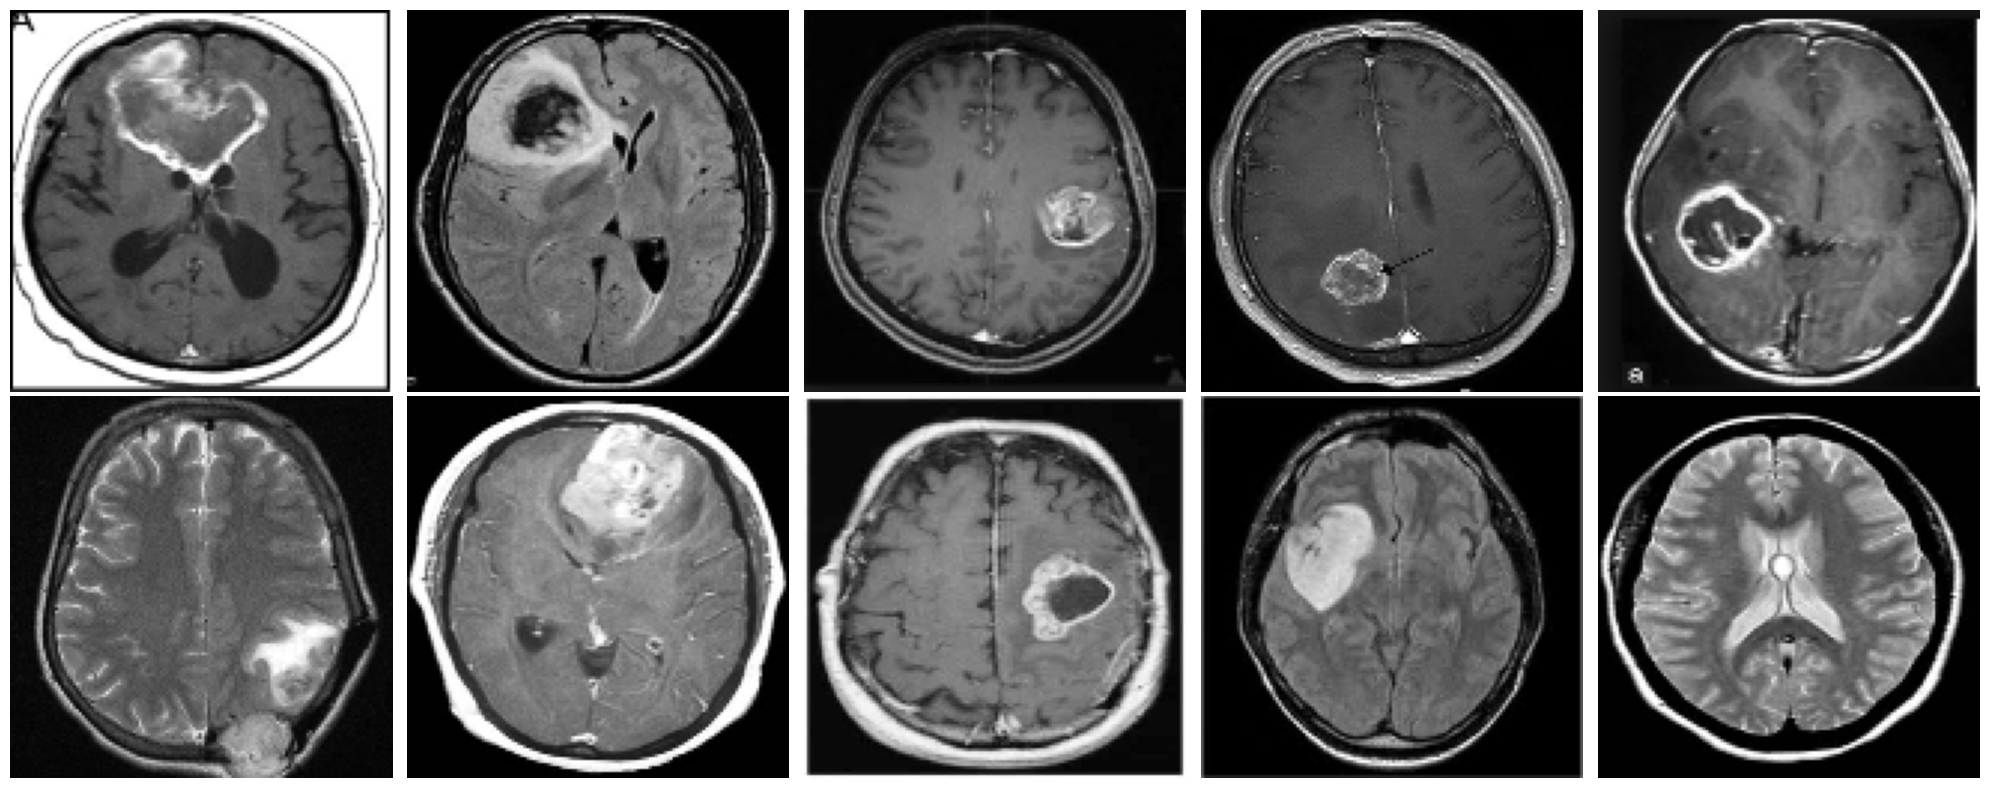

In [ ]:
#Plotting The Real Images
plt.figure(figsize=(20,8))
for i in range(10):
    axs = plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    plt.subplots_adjust(wspace=None, hspace=None)
plt.tight_layout()

In [ ]:
#The Architecture
def build_generator():

    """
        Generator model "generates" images using random noise. The random noise AKA Latent Vector
        is sampled from a Normal Distribution which is given as the input to the Generator. Using
        Transposed Convolution, the latent vector is transformed to produce an image
        We use 3 Conv2DTranspose layers (which help in producing an image using features; opposite
        of Convolutional Learning)

        Input: Random Noise / Latent Vector
        Output: Image
    """

    model = Sequential([

        Dense(32*32*256, input_dim=NOISE_DIM),
        LeakyReLU(alpha=0.2),
        Reshape((32,32,256)),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2DTranspose(128, (4, 4), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(CHANNELS, (4, 4), padding='same', activation='tanh')
    ],
    name="generator")
    model.summary()
    model.compile(loss="binary_crossentropy", optimizer=OPTIMIZER, )

    return model

In [ ]:
def build_discriminator():

    """
        Discriminator is the model which is responsible for classifying the generated images
        as fake or real. Our end goal is to create a Generator so powerful that the Discriminator
        is unable to classify real and fake images
        A simple Convolutional Neural Network with 2 Conv2D layers connected to a Dense output layer
        Output layer activation is Sigmoid since this is a Binary Classifier

        Input: Generated / Real Image
        Output: Validity of Image (Fake or Real)

    """

    model = Sequential([

        Conv2D(64, (3, 3), padding='same', input_shape=(WIDTH, HEIGHT, CHANNELS)),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(128, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Conv2D(256, (3, 3), strides=2, padding='same'),
        LeakyReLU(alpha=0.2),

        Flatten(),
        Dropout(0.4),
        Dense(1, activation="sigmoid", input_shape=(WIDTH, HEIGHT, CHANNELS))
    ], name="discriminator")
    model.summary()
    model.compile(loss="binary_crossentropy",optimizer=OPTIMIZER, )

    return model

In [ ]:
#Putting it together
print('\n')
discriminator = build_discriminator()
print('\n')
generator = build_generator()

discriminator.trainable = False

gan_input = Input(shape=(NOISE_DIM,))
fake_image = generator(gan_input)

gan_output = discriminator(fake_image)

gan = Model(gan_input, gan_output, name="gan_model")
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

print("The Combined Network:\n")
gan.summary()



Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      640       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       147584    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 32, 32, 128)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 256)   

In [ ]:
def sample_images(noise, subplots, figsize=(22,8), save=False):
    generated_images = generator.predict(noise)
    plt.figure(figsize=figsize)

    for i, image in enumerate(generated_images):
        plt.subplot(subplots[0], subplots[1], i+1)
        if CHANNELS == 1:
            plt.imshow(image.reshape((WIDTH, HEIGHT)), cmap='gray')

        else:
            plt.imshow(image.reshape((WIDTH, HEIGHT, CHANNELS)))
        if save == True:
            img_name = "gen" + str(i)
            plt.savefig(img_name)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

In [ ]:
#The Training
np.random.seed(SEED)
for epoch in range(10):
    for batch in tqdm(range(STEPS_PER_EPOCH)):

        noise = np.random.normal(0,1, size=(BATCH_SIZE, NOISE_DIM))
        fake_X = generator.predict(noise)

        idx = np.random.randint(0, X_train.shape[0], size=BATCH_SIZE)
        real_X = X_train[idx]

        X = np.concatenate((real_X, fake_X))

        disc_y = np.zeros(2*BATCH_SIZE)
        disc_y[:BATCH_SIZE] = 1

        d_loss = discriminator.train_on_batch(X, disc_y)

        y_gen = np.ones(BATCH_SIZE)
        g_loss = gan.train_on_batch(noise, y_gen)

    print(f"EPOCH: {epoch + 1} Generator Loss: {g_loss:.4f} Discriminator Loss: {d_loss:.4f}")
    noise = np.random.normal(0, 1, size=(10,NOISE_DIM))
    sample_images(noise, (2,5))

#Generation
noise = np.random.normal(0, 1, size=(100, NOISE_DIM))
sample_images(noise, (10,10), (24,20), save=True)

In [ ]:
#Testing Generated Sample
generated_images = generator.predict(noise)
generated_images.shape

4/4 [==============================] - 0s 29ms/step


(100, 128, 128, 1)

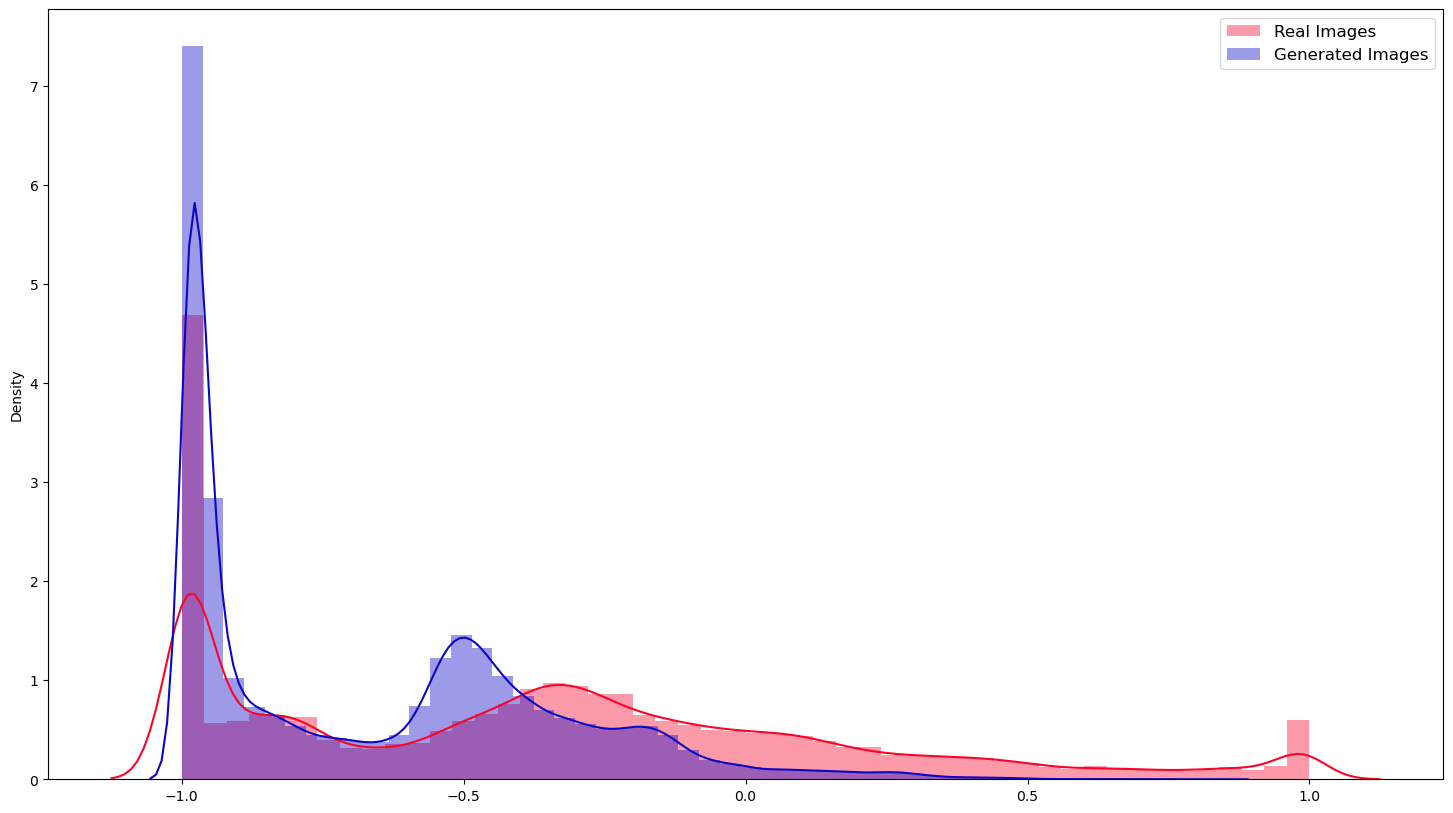

In [ ]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(18,10))

sns.distplot(X_train, label='Real Images', hist=True, color='#fc0328', ax=axs)
sns.distplot(generated_images, label='Generated Images', hist=True, color='#0c06c7', ax=axs)

axs.legend(loc='upper right', prop={'size': 12})

plt.show()

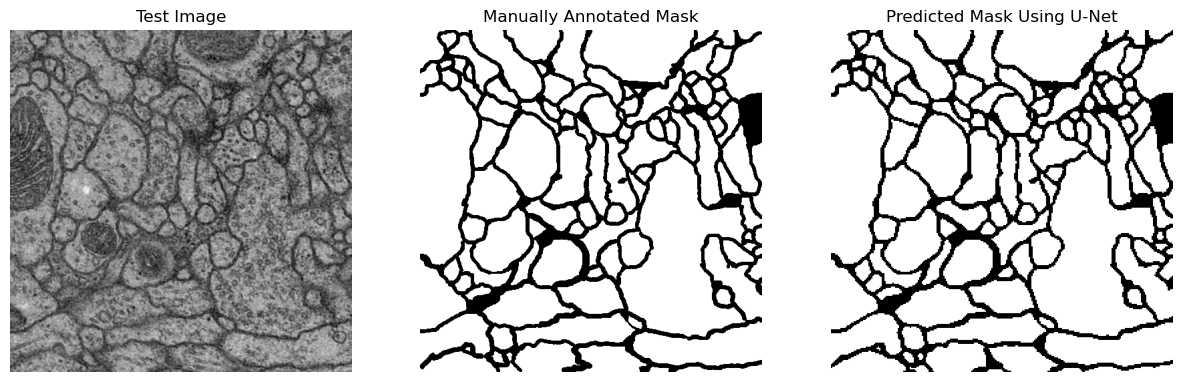

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Define the function to preprocess the test image
def preprocess_image(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Resize the image to 256x256
    image = cv2.resize(gray, (256, 256))
    # Normalize the pixel values to the range of 0-1
    image = image / 255.0
    # Add a channel dimension to the grayscale image
    image = np.expand_dims(image, axis=-1)
    return image

# Load the pre-trained U-Net model
model = load_model('/content/input/unet-dataset/Unet_NonDAPIStainedData/unet_membrane.hdf5')

# Define the path to the folder containing test images
test_images_folder = '/content/input/unet-dataset/Unet_NonDAPIStainedData/test/TestImage'

# Get a list of all test images
test_images = os.listdir(test_images_folder)

# Create an empty list to store the predicted masks
predicted_masks = []

# Define batch size and initialize an empty batch of images
batch_size = 32
batch_images = []

# Loop over the test images
for i, image_file in enumerate(test_images):
    # Load the test image
    image_path = os.path.join(test_images_folder, image_file)
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image)

    # Add the preprocessed image to the batch
    batch_images.append(preprocessed_image)

    # If the batch is full or it's the last image, predict the segmentation masks
    if len(batch_images) == batch_size or i == len(test_images) - 1:
        # Convert the batch of images to a numpy array
        batch_images = np.array(batch_images)

        # Predict the segmentation masks for the batch of test images
        batch_predicted_masks = model.predict_on_batch(batch_images)
        batch_predicted_masks = (batch_predicted_masks > 0.5).astype(np.uint8)

        # Append the predicted masks to the list
        predicted_masks.extend(batch_predicted_masks)

        # Clear the batch of images
        batch_images = []

# Loop over the predicted masks and test images for visualization
for i in range(1):
    # Load the test image
    image_file = test_images[i]
    image_path = os.path.join(test_images_folder, image_file)
    image = cv2.imread(image_path)

    masks_folder = "/content/input/unet-dataset/Unet_NonDAPIStainedData/test/Manually_Annotated_Mask"

    # Load the manually annotated mask
    mask_file = os.listdir(masks_folder)[i]  # Assuming i corresponds to the image index
    mask_path = os.path.join(masks_folder, mask_file)
    manually_annotated_mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

    # Create a figure with subplots
    plt.figure(figsize=(15, 5))

    # Display the test image
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Test Image")
    plt.axis("off")

    # Display the manually annotated mask
    plt.subplot(1, 3, 2)
    plt.imshow(manually_annotated_mask, cmap="gray")
    plt.title("Manually Annotated Mask")
    plt.axis("off")

    # Display the predicted mask
    plt.subplot(1, 3, 3)
    plt.imshow(predicted_masks[i][:, :, 0], cmap="gray")
    plt.title("Predicted Mask Using U-Net")
    plt.axis("off")
    # Show the figure
    plt.show()